# HW7. ANOVA.
#### Ильичёв А.С., 693

In [23]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd
from statsmodels.stats.multitest import multipletests

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5) 

# Задача 2

Пусть гипотеза о нормальности $\varepsilon_{ij}$ верна, тогда матожидание случайной ошибки равно нулю. Пусть $\overline X_i = \frac1k\sum_{j=1}^k X_{ij}$, $\overline X_j = \frac1n\sum_{i=1}^n X_{ij}$. Тогда:
$$
\overline X_i - X_{ij} = (\overline\beta - \beta_j) - \varepsilon_{ij}
$$
$$
\overline X_j - X_{ij} = (\overline\alpha - \alpha_i) - \varepsilon_{ij}
$$

Сложив и добавив $X_{ij}$, получим

$$
\overline X_j + \overline X_i - X_{ij} = \mu + \overline\alpha + \overline\beta - \varepsilon_{ij}
$$

В правой части выражения стоит сумма нормально распределенной случайной величины и констант модели, то есть это, по сути, нормальное распределение со сдвигом и можно проверять на нормальность выборку $Y_{ij} = \overline X_j + \overline X_i - X_{ij}$.

# Задача 3

In [24]:
with open('hw7t3.txt', 'r') as f:
    string = f.read()

In [25]:
# from stackoverflow
import re
import ast
import numpy as np
def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))

In [26]:
data = str2array(string)
data.shape

(151, 3)

In [27]:
data[:5]

array([['Mr., Fattakhov', 'Mildronate', '0'],
       ['Mr., Fattakhov', 'Mildronate', '28'],
       ['Mr., Fattakhov', 'Mildronate', '24'],
       ['Mr., Fattakhov', 'Mildronate', '32'],
       ['Mr., Fattakhov', 'Mildronate', '30']], dtype='<U14')

In [28]:
df = pd.DataFrame(data, columns=['name', 'med', 'time'])
df['time'] = df['time'].astype(int)

In [29]:
df.head()

,name,med,time
0,"Mr., Fattakhov",Mildronate,0
1,"Mr., Fattakhov",Mildronate,28
2,"Mr., Fattakhov",Mildronate,24
3,"Mr., Fattakhov",Mildronate,32
4,"Mr., Fattakhov",Mildronate,30


In [30]:
meds = df['med'].unique()
meds

array(['Mildronate', 'Codeine', 'Analgine', 'Iodomarine', 'Irunine',
       'Permetrine'], dtype=object)

In [33]:
names = df['name'].unique()
names

array(['Mr., Fattakhov', 'Gospodin, Tsay'], dtype=object)

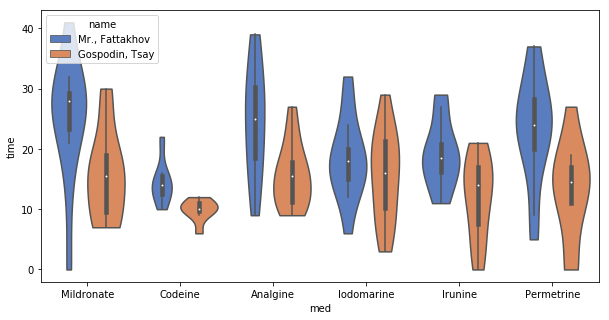

In [34]:
sns.violinplot(x='med', y='time', data=df, hue='name', cut=0, palette='muted');


Видим, что лекарства по-разному действуют на двух господ. Будет строить рекомендации для каждого из них отдельно.

In [35]:
fattakh = df[df['name'] == names[0]]
tsay = df[df['name'] == names[1]]

In [36]:
stds = [tsay[tsay['med'] == med]['time'].std() for med in meds]
print(np.max(stds) / np.min(stds))

stds = [fattakh[fattakh['med'] == med]['time'].std() for med in meds]
print(np.max(stds) / np.min(stds))

4.5724552147564275
2.97399574026432


Можем пользоваться критерием Фишера. Зафиксируем уровень значимости 0.05.

In [37]:
def perform_f(df):
    samples = []
    for med in meds:
        samples.append(np.array(df[df['med'] == med]['time'], dtype=float))
    print(sts.f_oneway(*samples))
    return samples

In [38]:
samples_tsay = perform_f(tsay)

F_onewayResult(statistic=1.3433477742279953, pvalue=0.25742091233589365)


In [39]:
samples_fattakh = perform_f(fattakh)

F_onewayResult(statistic=4.276294914472828, pvalue=0.0018004759884380859)


Для Цая мы принимаем гипотезу об однородности выборок, то есть лекарства не оказывают на него положительного эффекта по сравнению с плацебо. Для Фаттахова гипотеза однородности отвергается, то есть можно найти лекарства, которые помогают ему лучше. Используем для этого тест Тьюки.

In [40]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [41]:
mcomp = MultiComparison(fattakh['time'], fattakh['med'])
res = mcomp.tukeyhsd()
res.summary()

group1,group2,meandiff,lower,upper,reject
Analgine,Codeine,-10.225,-18.3124,-2.1376,True
Analgine,Iodomarine,-6.1635,-14.5658,2.2389,False
Analgine,Irunine,-5.525,-14.5961,3.5461,False
Analgine,Mildronate,0.4583,-8.135,9.0516,False
Analgine,Permetrine,-1.1964,-9.4315,7.0387,False
Codeine,Iodomarine,4.0615,-4.4654,12.5885,False
Codeine,Irunine,4.7,-4.4866,13.8866,False
Codeine,Mildronate,10.6833,1.9681,19.3985,True
Codeine,Permetrine,9.0286,0.6664,17.3908,True
Iodomarine,Irunine,0.6385,-8.8266,10.1035,False


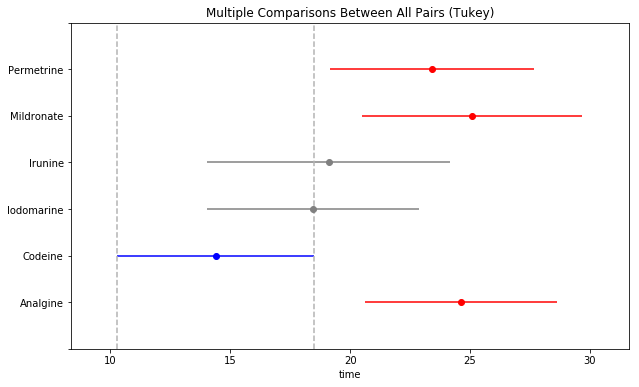

In [42]:
res.plot_simultaneous(comparison_name='Codeine', xlabel='time');

Видим, что Codeine оказывает на Фаттахова статистически значимый успокаивающий эффект по сравнению с тремя другими лекарствами. Тем не менее, гипотеза о том, что его действие не отличается от плацебо, под видом которого выступает ирунин, не отвергается. 

# Задача 4


In [43]:
data = np.load('hw7t4.npy')
data.shape

(250, 3)

In [44]:
data[:5]

array([[0.        , 0.        , 1.03882938],
       [0.        , 0.        , 2.84280846],
       [0.        , 0.        , 0.89072925],
       [0.        , 0.        , 2.17677622],
       [0.        , 0.        , 0.91522938]])

In [45]:
df = pd.DataFrame(data, columns=['1', '2', 'target'])
df.head()

,1,2,target
0,0.0,0.0,1.038829
1,0.0,0.0,2.842808
2,0.0,0.0,0.890729
3,0.0,0.0,2.176776
4,0.0,0.0,0.915229


In [46]:
df.describe()

,1,2,target
count,250.000000,250.000000,250.000000
mean,2.000000,2.000000,2.591793
std,1.417051,1.417051,1.585729
min,0.000000,0.000000,-1.100667
25%,1.000000,1.000000,1.569911
50%,2.000000,2.000000,2.527358
75%,3.000000,3.000000,3.308374
max,4.000000,4.000000,9.506097


In [47]:
df['1'].unique()

array([0., 1., 2., 3., 4.])

In [48]:
df['2'].unique()

array([0., 1., 2., 3., 4.])

In [49]:
df['1'].value_counts()

4.0    50
3.0    50
2.0    50
1.0    50
0.0    50
Name: 1, dtype: int64

In [50]:
for i in range(5):
    print(df[df['1'] == i]['2'].value_counts())

4.0    10
3.0    10
2.0    10
1.0    10
0.0    10
Name: 2, dtype: int64
4.0    10
3.0    10
2.0    10
1.0    10
0.0    10
Name: 2, dtype: int64
4.0    10
3.0    10
2.0    10
1.0    10
0.0    10
Name: 2, dtype: int64
4.0    10
3.0    10
2.0    10
1.0    10
0.0    10
Name: 2, dtype: int64
4.0    10
3.0    10
2.0    10
1.0    10
0.0    10
Name: 2, dtype: int64


Признаки принимают дискретные значения, причем размеры выборок для каждого признака одинаковы. А значит, критерий Фишера устойчив к нарушению предположений и его можно использовать. Тем не менее, проверим предположение о равенстве дисперсий.

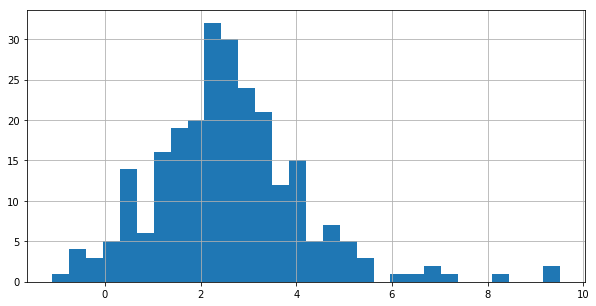

In [51]:
df['target'].hist(bins=30)

Разобьем выборку на ячейки по значениям признаков.

In [52]:
samples = np.zeros((5, 5, 10))
stds = []
means_jl = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        samples[i, j] = np.array(df[(df['1'] == i) & (df['2'] == j)]['target'])
        stds.append(samples[i, j].std())
        means_jl[i, j] = samples[i, j].mean()
print(np.max(stds) / np.min(stds))

4.030044596716744


Отношение меньше 10, так что считаем предположение о равенстве дисперсий выполненным.

Посчитаем выборочные средние:

In [53]:
means_j = np.array([df[df['1'] == i]['target'].mean() for i in range(5)])
means_l = np.array([df[df['2'] == i]['target'].mean() for i in range(5)])
mean = df['target'].mean()
k = m = 5
n = 10

In [54]:
mean

2.5917929681669016

Внутрифакторные дисперсии:

In [55]:
samples_moved = np.moveaxis(samples, -1, 0)
samples_moved.shape

(10, 5, 5)

In [56]:
s_1 = n * m / (k - 1) * np.sum((means_j - mean)**2)
s_2 = n * k / (m - 1) * np.sum((means_l - mean)**2)
s_12 = n / ((k - 1) * (m - 1)) * np.sum((means_jl - means_j.reshape(1,5).T - means_l + mean)**2)
s_int = 1 / (k * m * (n - 1)) * np.sum((samples_moved - means_jl.reshape(1,5,5))**2)

Применим правосторонний критерий, в таком случае $p = 1 - F$.

In [57]:
f1 = s_1 / s_int
pvalue1 = sts.f.sf(x=f1, dfn=(k - 1), dfd=k * m * (n - 1))
f1, pvalue1

(4.5366664823037, 0.0015250993253828752)

In [58]:
f2 = s_2 / s_int
pvalue2 = sts.f.sf(x=f2, dfn=(m - 1), dfd=k * m * (n - 1))
f2, pvalue2

(10.558736521266232, 7.391588105091947e-08)

In [59]:
f12 = s_12 / s_int
pvalue12 = sts.f.sf(x=f12, dfn=(m - 1) * (k - 1), dfd=k * m * (n - 1))
f12, pvalue12

(0.8335850140678461, 0.6466025101739976)

In [60]:
multipletests([pvalue1, pvalue2, pvalue12], alpha=0.05, method='holm')

(array([ True,  True, False]),
 array([3.05019865e-03, 2.21747643e-07, 6.46602510e-01]),
 0.016952427508441503,
 0.016666666666666666)

Отвергаем гипотезы об отсутствии влиянии признаков на целевую переменную. Принимаем гипотезу об отсутствии взаимодействия факторов.